Plot results from testing nodes and other sensitivities

In [1]:
import numpy as np
import matplotlib.pyplot as plt

For this test, all simulations were given 6 hours of wallclock time, so we can examine how far the simulations got.

We can also check the time step, since modifications were made that can affect this, in principle.

In [2]:
test_name = [
    'N = 33',
    'N = 33, ZADV=Imp',
    'N = 40',
    'N = 45',
]
ntest = len(test_name)

t_max = [
    '2016-07-02_11:20:00',
    '2016-07-02_11:20:00',
    '2016-07-02_11:40:00',
    '2016-07-02_12:00:00',
]

t_max = [t.replace('_', 'T') for t in t_max] # Replace underscore with "T" in t_max
t_max = np.array(t_max, dtype='datetime64') # Convert to datetime64
t_init = np.datetime64('2016-07-02T00:00:00') # Sim init time
t_max = [np.timedelta64(t - t_init, 's').astype(np.float64) / 3600 for t in t_max] # Convert to hours

dt = [
    8,
    8,
    8,
    8,
]

In [3]:
def plot_scatter(variable, ylabel=None, title=None, ylim=None):
    plt.scatter(test_name, variable, s=75)#, c=t_max, cmap='viridis')
    plt.ylabel(ylabel)
    plt.title(title)
    if ylim is not None:
        plt.ylim(ylim)
    plt.show()
    plt.close()
    return None

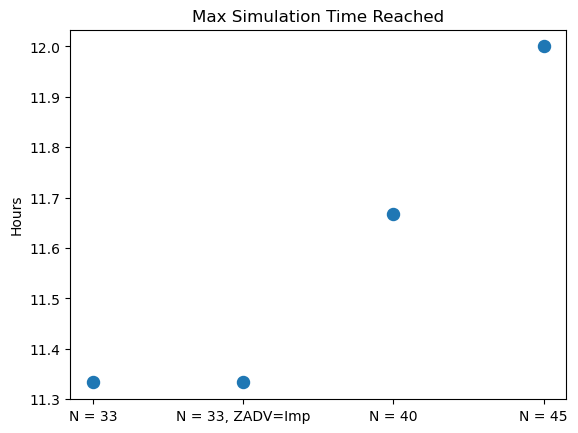

In [4]:
plot_scatter(
    variable=t_max,
    ylabel='Hours',
    title='Max Simulation Time Reached',
    )

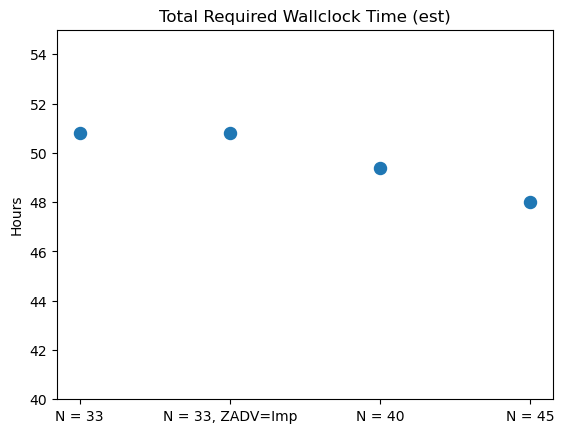

In [5]:
time_simulation = 4*24 # total hours of one simulation
fraction = [t_max[t] / time_simulation for t in range(ntest)]
total_wc_time = 6./np.array(fraction)

plot_scatter(
    variable=total_wc_time,
    ylabel='Hours',
    title='Total Required Wallclock Time (est)',
    ylim=(40, 55),
    )

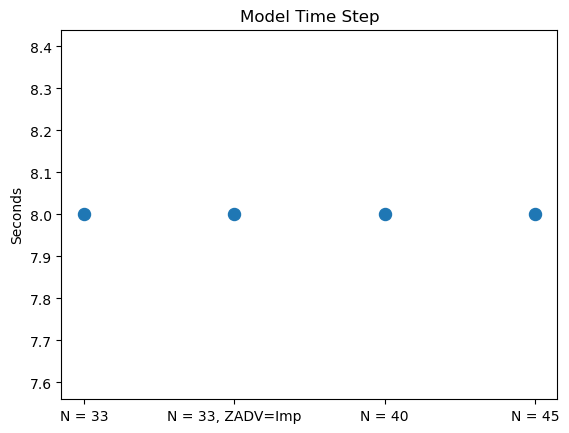

In [6]:
time_simulation = 4*24 # total hours of one simulation
fraction = [t_max[t] / time_simulation for t in range(ntest)]
total_wc_time = 6./np.array(fraction)

plot_scatter(
    variable=dt,
    ylabel='Seconds',
    title='Model Time Step',
    # ylim=(40, 55),
    )